<a href="https://colab.research.google.com/github/ashish1610dhiman/pinn_option_pricing/blob/main/add_spot_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [5]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
ndx_data = yf.download("NDX", start='2021-06-14', end='2022-06-28')
ndx_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-14,14128.200195,14128.200195,14128.200195,14128.200195,14128.200195,0
2021-06-15,14030.410156,14030.410156,14030.410156,14030.410156,14030.410156,0
2021-06-16,13983.009766,13983.009766,13983.009766,13983.009766,13983.009766,0
2021-06-17,14163.809570,14163.809570,14163.809570,14163.809570,14163.809570,0
2021-06-18,14049.580078,14049.580078,14049.580078,14049.580078,14049.580078,0


In [10]:
ndx_call_data = pd.read_csv("df_eur_call_NDX_jun2021.csv")
ndx_call_data.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,current_time
0,1233952,102480,2021-06-21,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,493.5,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.989041
1,1247280,102480,2021-06-22,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,530.6,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.986301
2,1260302,102480,2021-06-23,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,515.7,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.983562
3,1274228,102480,2021-06-24,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,552.5,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.980822
4,1288162,102480,2021-06-25,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,539.3,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.978082


In [13]:
ndx_data.reset_index().dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [14]:
ndx_call_data["date"]=pd.to_datetime(ndx_call_data["date"])

In [17]:
ndx_call1 = ndx_call_data.merge(ndx_data.reset_index(),left_on="date",right_on="Date",suffixes=("","_NDX"))
ndx_call1.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,exercise_style,am_set_flag,current_time,Date,Open,High,Low,Close,Adj Close,Volume
0,1233952,102480,2021-06-21,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,493.5,...,E,NaN,0.989041,2021-06-21,14137.230469,14137.230469,14137.230469,14137.230469,14137.230469,0
1,1247280,102480,2021-06-22,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,530.6,...,E,NaN,0.986301,2021-06-22,14270.419922,14270.419922,14270.419922,14270.419922,14270.419922,0
2,1260302,102480,2021-06-23,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,515.7,...,E,NaN,0.983562,2021-06-23,14274.240234,14274.240234,14274.240234,14274.240234,14274.240234,0
3,1274228,102480,2021-06-24,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,552.5,...,E,NaN,0.980822,2021-06-24,14365.959961,14365.959961,14365.959961,14365.959961,14365.959961,0
4,1288162,102480,2021-06-25,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,539.3,...,E,NaN,0.978082,2021-06-25,14345.179688,14345.179688,14345.179688,14345.179688,14345.179688,0


In [52]:
call_data = ndx_call1[["Adj Close","current_time","strike_price","best_bid","best_offer","ticker","impl_volatility"]]
call_data["strike_price"] = call_data["strike_price"]/1000
call_data["market_price"] = (call_data["best_bid"]+call_data["best_offer"])/2
call_data = call_data.rename(columns={"Adj Close":"spot_price"})
call_data.head()

<ipython-input-52-d5c791843bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data["strike_price"] = call_data["strike_price"]/1000
<ipython-input-52-d5c791843bda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data["market_price"] = (call_data["best_bid"]+call_data["best_offer"])/2


,spot_price,current_time,strike_price,best_bid,best_offer,ticker,impl_volatility,market_price
0,14137.230469,0.989041,15700.0,493.5,528.5,NDX,0.196978,511.00
1,14270.419922,0.986301,15700.0,530.6,557.9,NDX,0.195356,544.25
2,14274.240234,0.983562,15700.0,515.7,544.3,NDX,0.192452,530.00
3,14365.959961,0.980822,15700.0,552.5,592.4,NDX,0.194887,572.45
4,14345.179688,0.978082,15700.0,539.3,575.6,NDX,0.193641,557.45


In [53]:
call_data.mean()

<ipython-input-53-108fd7c3a6d0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  call_data.mean()


spot_price         14694.593309
current_time           0.498091
strike_price       15700.000000
best_bid             654.208787
best_offer           670.446653
impl_volatility        0.254684
market_price         662.327720
dtype: float64

Text(0.5, 1.0, 'NDX Spot Price and European Call price')

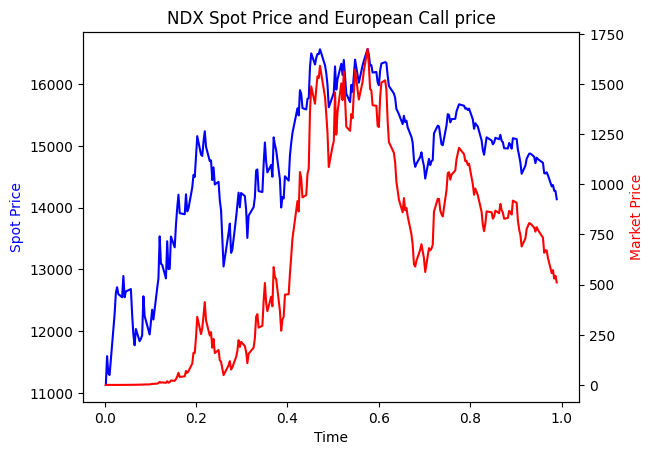

In [43]:
fig, ax1 = plt.subplots()
# Plot the "Spot Price" on the left axis
ax1.plot(call_data["current_time"], call_data["spot_price"], label="Spot Price", color="blue")
ax1.set_xlabel('Time')
ax1.set_ylabel('Spot Price', color="blue")
ax2 = ax1.twinx()
# ax1.legend(
# Plot the "Market Price" on the right axis
ax2.plot(call_data["current_time"], call_data["market_price"], label="Market Price", color="red")
ax2.set_ylabel('Market Price', color="red")
plt.title("NDX Spot Price and European Call price")
# ax2.legend()

In [32]:
call_data.to_csv("NDX_call_data.csv")

In [45]:
call_data.std()

<ipython-input-45-e4d50b2a6545>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  call_data.std()


spot_price      1207.976717
current_time       0.286294
strike_price       0.000000
best_bid         489.270553
best_offer       496.745189
market_price     492.989815
dtype: float64

## American Put

In [35]:
spxc_data = yf.download("SPXC", start='2021-01-01', end='2021-10-20')
spxc_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,55.000000,55.150002,52.580002,53.189999,53.189999,231000
2021-01-05,53.250000,55.020000,53.180000,54.580002,54.580002,186500
2021-01-06,55.730000,58.869999,55.730000,57.950001,57.950001,320600
2021-01-07,58.209999,59.230000,56.250000,57.869999,57.869999,551500
2021-01-08,58.380001,58.380001,56.310001,57.090000,57.090000,260100


In [36]:
spxc_put_data = pd.read_csv("df_amer_put_SPXC_feb2021.csv")
spxc_put_data.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,current_time
0,3258754,109823,2021-02-01,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,26.8,...,0,1,NaN,0,NaN,SPX TECHNOLOGIES INC,NaN,A,NaN,0.701370
1,3258882,109823,2021-02-02,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.7,...,0,1,NaN,0,NaN,SPX TECHNOLOGIES INC,NaN,A,NaN,0.698630
2,3259010,109823,2021-02-03,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.7,...,0,1,NaN,0,NaN,SPX TECHNOLOGIES INC,NaN,A,NaN,0.695890
3,3259138,109823,2021-02-04,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,26.0,...,0,1,NaN,0,NaN,SPX TECHNOLOGIES INC,NaN,A,NaN,0.693151
4,3259266,109823,2021-02-05,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.4,...,0,1,NaN,0,NaN,SPX TECHNOLOGIES INC,NaN,A,NaN,0.690411


In [38]:
spxc_put_data["date"]=pd.to_datetime(spxc_put_data["date"])

In [39]:
spxc_put1 = spxc_put_data.merge(spxc_data.reset_index(),left_on="date",right_on="Date",suffixes=("","_SPXC"))
spxc_put1.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,exercise_style,am_set_flag,current_time,Date,Open,High,Low,Close,Adj Close,Volume
0,3258754,109823,2021-02-01,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,26.8,...,A,NaN,0.701370,2021-02-01,52.740002,53.880001,51.740002,53.470001,53.470001,232400
1,3258882,109823,2021-02-02,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.7,...,A,NaN,0.698630,2021-02-02,54.279999,55.290001,53.759998,54.549999,54.549999,205000
2,3259010,109823,2021-02-03,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.7,...,A,NaN,0.695890,2021-02-03,54.400002,54.439999,52.669998,53.490002,53.490002,133800
3,3259138,109823,2021-02-04,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,26.0,...,A,NaN,0.693151,2021-02-04,53.520000,54.540001,53.520000,53.939999,53.939999,83600
4,3259266,109823,2021-02-05,SPXC 211015P80000,1,2021-10-15,NaN,P,80000,25.4,...,A,NaN,0.690411,2021-02-05,54.650002,54.650002,53.910000,54.570000,54.570000,85500


In [55]:
put_data = spxc_put1[["Adj Close","current_time","strike_price","best_bid","best_offer","ticker","impl_volatility"]]
put_data["strike_price"] = put_data["strike_price"]/1000
put_data["market_price"] = (put_data["best_bid"]+call_data["best_offer"])/2
put_data = put_data.rename(columns={"Adj Close":"spot_price"})
put_data.head()

<ipython-input-55-5cd52fe183a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  put_data["strike_price"] = put_data["strike_price"]/1000
<ipython-input-55-5cd52fe183a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  put_data["market_price"] = (put_data["best_bid"]+call_data["best_offer"])/2


,spot_price,current_time,strike_price,best_bid,best_offer,ticker,impl_volatility,market_price
0,53.470001,0.701370,80.0,26.8,30.0,SPXC,0.462574,277.65
1,54.549999,0.698630,80.0,25.7,28.0,SPXC,0.407782,291.80
2,53.490002,0.695890,80.0,25.7,29.5,SPXC,0.395698,285.00
3,53.939999,0.693151,80.0,26.0,28.9,SPXC,0.417716,309.20
4,54.570000,0.690411,80.0,25.4,28.3,SPXC,0.411611,300.50


Text(0.5, 1.0, 'SPXC Spot Price and American Put price')

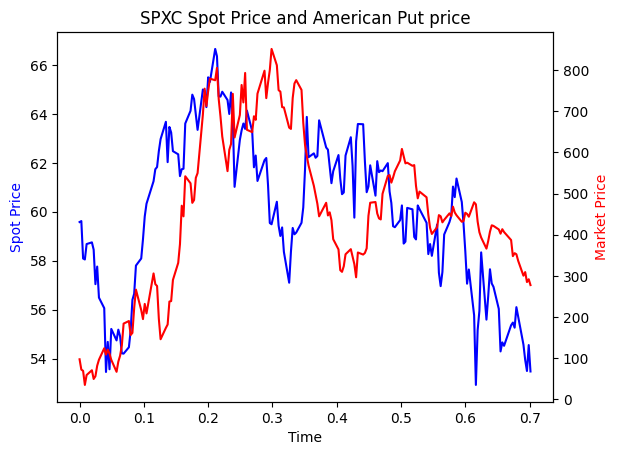

In [44]:
fig, ax1 = plt.subplots()
# Plot the "Spot Price" on the left axis
ax1.plot(put_data["current_time"], put_data["spot_price"], label="Spot Price", color="blue")
ax1.set_xlabel('Time')
ax1.set_ylabel('Spot Price', color="blue")
ax2 = ax1.twinx()
# ax1.legend()
# Plot the "Market Price" on the right axis
ax2.plot(put_data["current_time"], put_data["market_price"], label="Market Price", color="red")
ax2.set_ylabel('Market Price', color="red")
plt.title("SPXC Spot Price and American Put price")
# ax2.legend()

In [56]:
put_data.mean()

<ipython-input-56-3f051a8f0b00>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  put_data.mean()


spot_price          59.919667
current_time         0.349528
strike_price        80.000000
best_bid            19.084444
best_offer          22.131667
impl_volatility      0.426987
market_price       442.501389
dtype: float64

In [67]:
put_data.to_csv("SPXC_put_data.csv")

In [57]:
put_data.std()

<ipython-input-57-25bfc7e37df8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  put_data.std()


spot_price           3.209963
current_time         0.205538
strike_price         0.000000
best_bid             3.282931
best_offer           3.542708
impl_volatility      0.294607
market_price       204.421804
dtype: float64

In [63]:
treasury_yield_data = yf.download("^IRX", start='2021-01-01', end='2021-10-20')
treasury_yield_data.mean()

[*********************100%%**********************]  1 of 1 completed


Open         0.032607
High         0.034264
Low          0.030299
Close        0.031935
Adj Close    0.031935
Volume       0.000000
dtype: float64

In [65]:
treasury_yield_data = yf.download("^IRX", start='2021-06-14', end='2022-06-28')
treasury_yield_data.mean()

[*********************100%%**********************]  1 of 1 completed


Open         0.317221
High         0.325519
Low          0.306634
Close        0.317248
Adj Close    0.317248
Volume       0.000000
dtype: float64